# Telco_Churn

---
I. Problem definition

1. Import Packages and Data
2. Userdefined Funktions
3. First Look at the Data
4. EDA
5. Feature Selection
6. Processing
7. Class Weights
8. Modeling
9. Hyperparameter Optimization
10. Ensemble Methods
11. Visualization of Final Model


---

## I. Problem definition

“Customer Churn” refers to the loss of customers. That is, if a customer or a client stops taking services from a company, it is said that he/she has churned.

Since Churn is intimately connected to a company’s performance, one can analyze customer churn to get insights into the shortcomings of the provided services. Improving on these key shortcomings can persuade customers to stay, which would help the company to make more money.

## 1. Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt

ModuleNotFoundError: No module named 'scikitplot'

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from mlxtend.classifier import StackingCVClassifier
from scipy import stats


In [4]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## 2. Userdefined Functions

In [5]:
def first_look(col):
    
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
def evaluation(model,x_test,y_test):
    
    print("Test AUC:",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('Train AUC:',roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1]))


## 3. First Look at the Data

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 3 numerical features, the rest is categorical

In [9]:
df.describe().T.style.background_gradient(cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000


In [10]:
first_look('SeniorCitizen')

column name    :  SeniorCitizen
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


SeniorCitizen seems to be categorical after all

In [11]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


TotalCharges has 6531 values and it has 11 empty values

In [12]:
first_look('TotalCharges')


column name    :  TotalCharges
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6531
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


"TotalCharges" contains numerical values as objects

Change type to float and replace empty cells with np.nan:

In [13]:

df['TotalCharges']= df['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)


DataAnalasys to find the right imputer strategy:
The TotalCharge might be 0 because the customers are new. In that case the value should be set to 0

In [14]:
df['tenure'].min()

0

In [15]:
first_look("tenure")

column name    :  tenure
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  73
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


There are 11 customers that are new and 11 customers where the TotalCharge is blank

In [16]:
np.where(df['tenure'] == df['tenure'].min())

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [20]:
np.where(df['TotalCharges'] == df["TotalCharges"].min())

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

Indeces where the tenure is 0 and TotalCharges is 0, are the same.
This means the Total Charges has to be 0 because they are new customers.

In [19]:
df['TotalCharges']=df['TotalCharges'].fillna(0)
first_look('TotalCharges')

column name    :  TotalCharges
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6531
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64


CustomerID has no value for the prediction of Churn so it is dropped.
Also duplicate rows should be dropped.

In [19]:
df.shape

(7043, 21)

In [20]:
df.drop("customerID", axis=1, inplace=True)
df.drop_duplicates(keep=False, inplace=True)
df.shape

(7001, 20)

## EDA

First look at the label "Churn"

column name    :  Churn
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
No     5156
Yes    1845
Name: Churn, dtype: int64


([<matplotlib.patches.Wedge at 0x25addc73c70>,
 [Text(-0.7440535518657286, 0.8101754821987602, 'No'),
  Text(0.7440535518657289, -0.81017548219876, 'Yes')],
 [Text(-0.405847391926761, 0.44191389938114195, '73.6%'),
  Text(0.40584739192676117, -0.4419138993811418, '26.4%')])

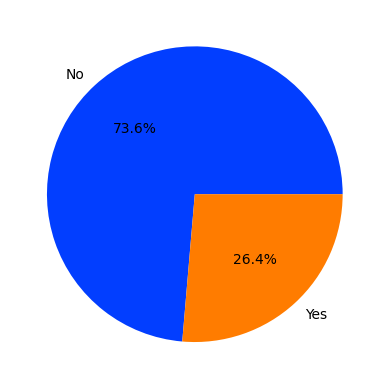

In [21]:
first_look('Churn')
churn_values = list(df['Churn'].value_counts())
colors = sns.color_palette('bright')[0:5]
plt.pie(x = churn_values, labels = ["No","Yes"], colors = colors, autopct='%.1f%%')

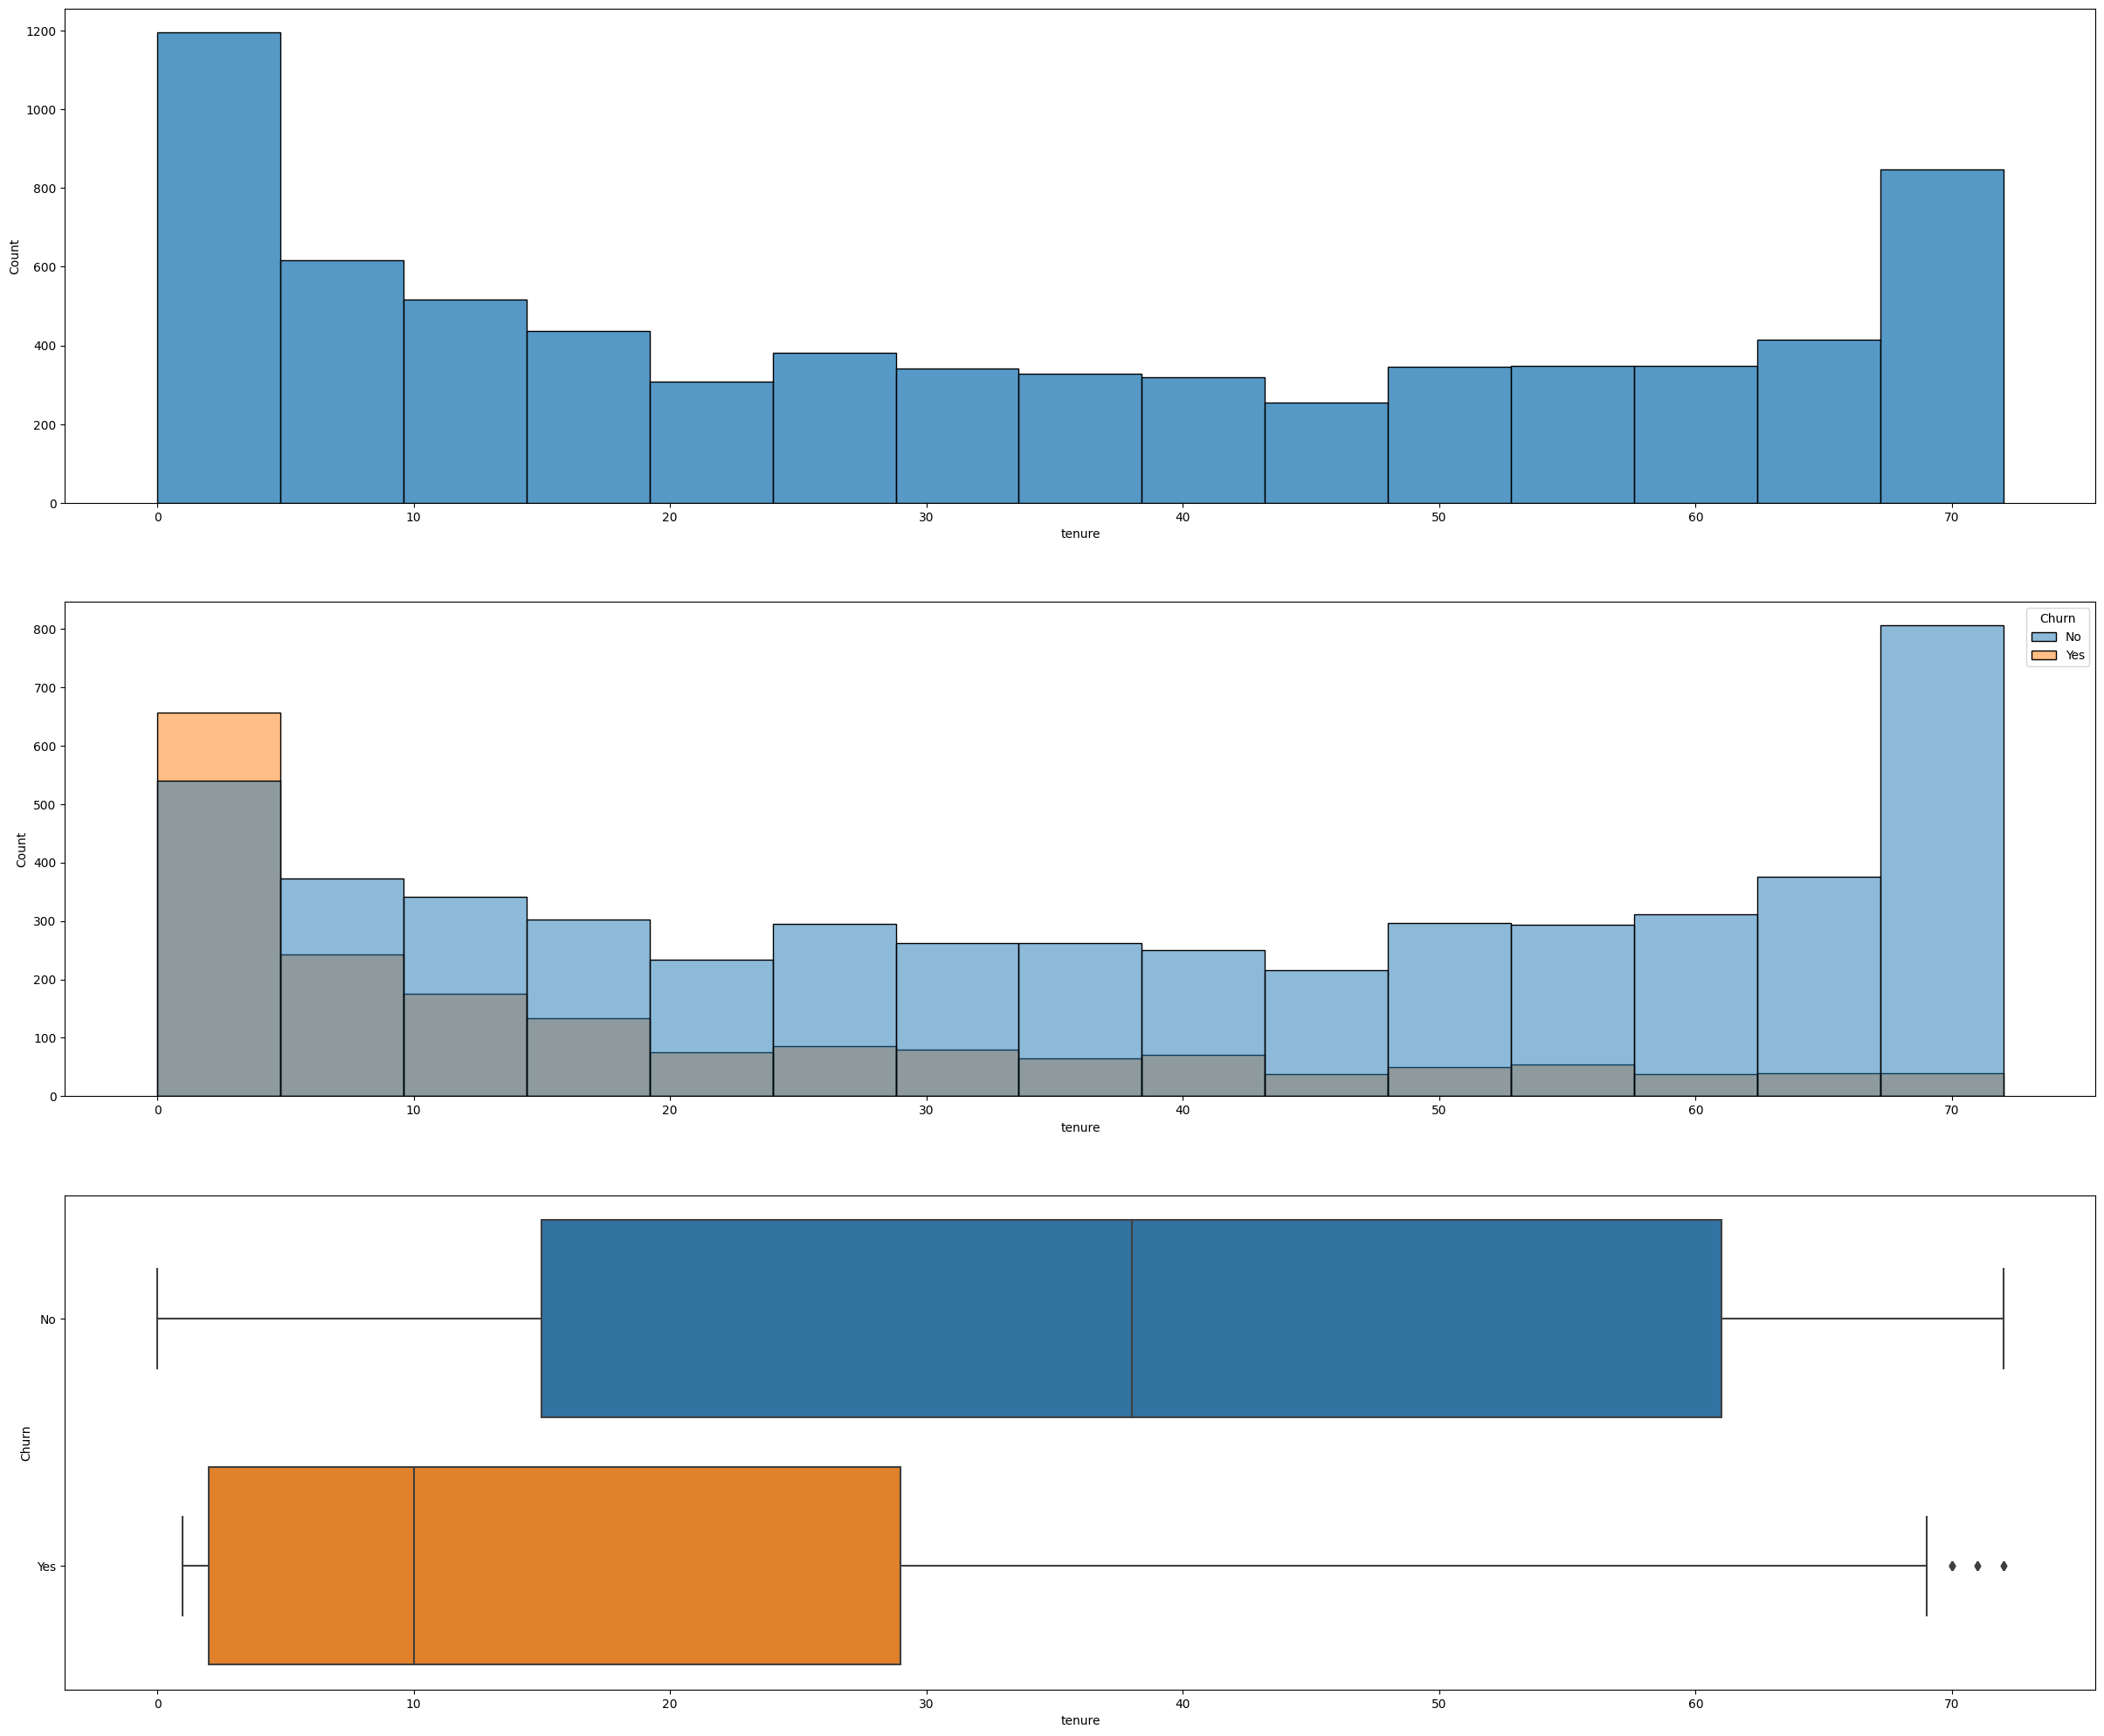

In [22]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="tenure", ax=ax[0])
t = sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")
t = sns.boxplot(x="tenure", y="Churn", data=df, ax=ax[2])

It seems like long-lasting customers are unlikely to churn 
Customers that have a tenure of under a year are highly likely to churn

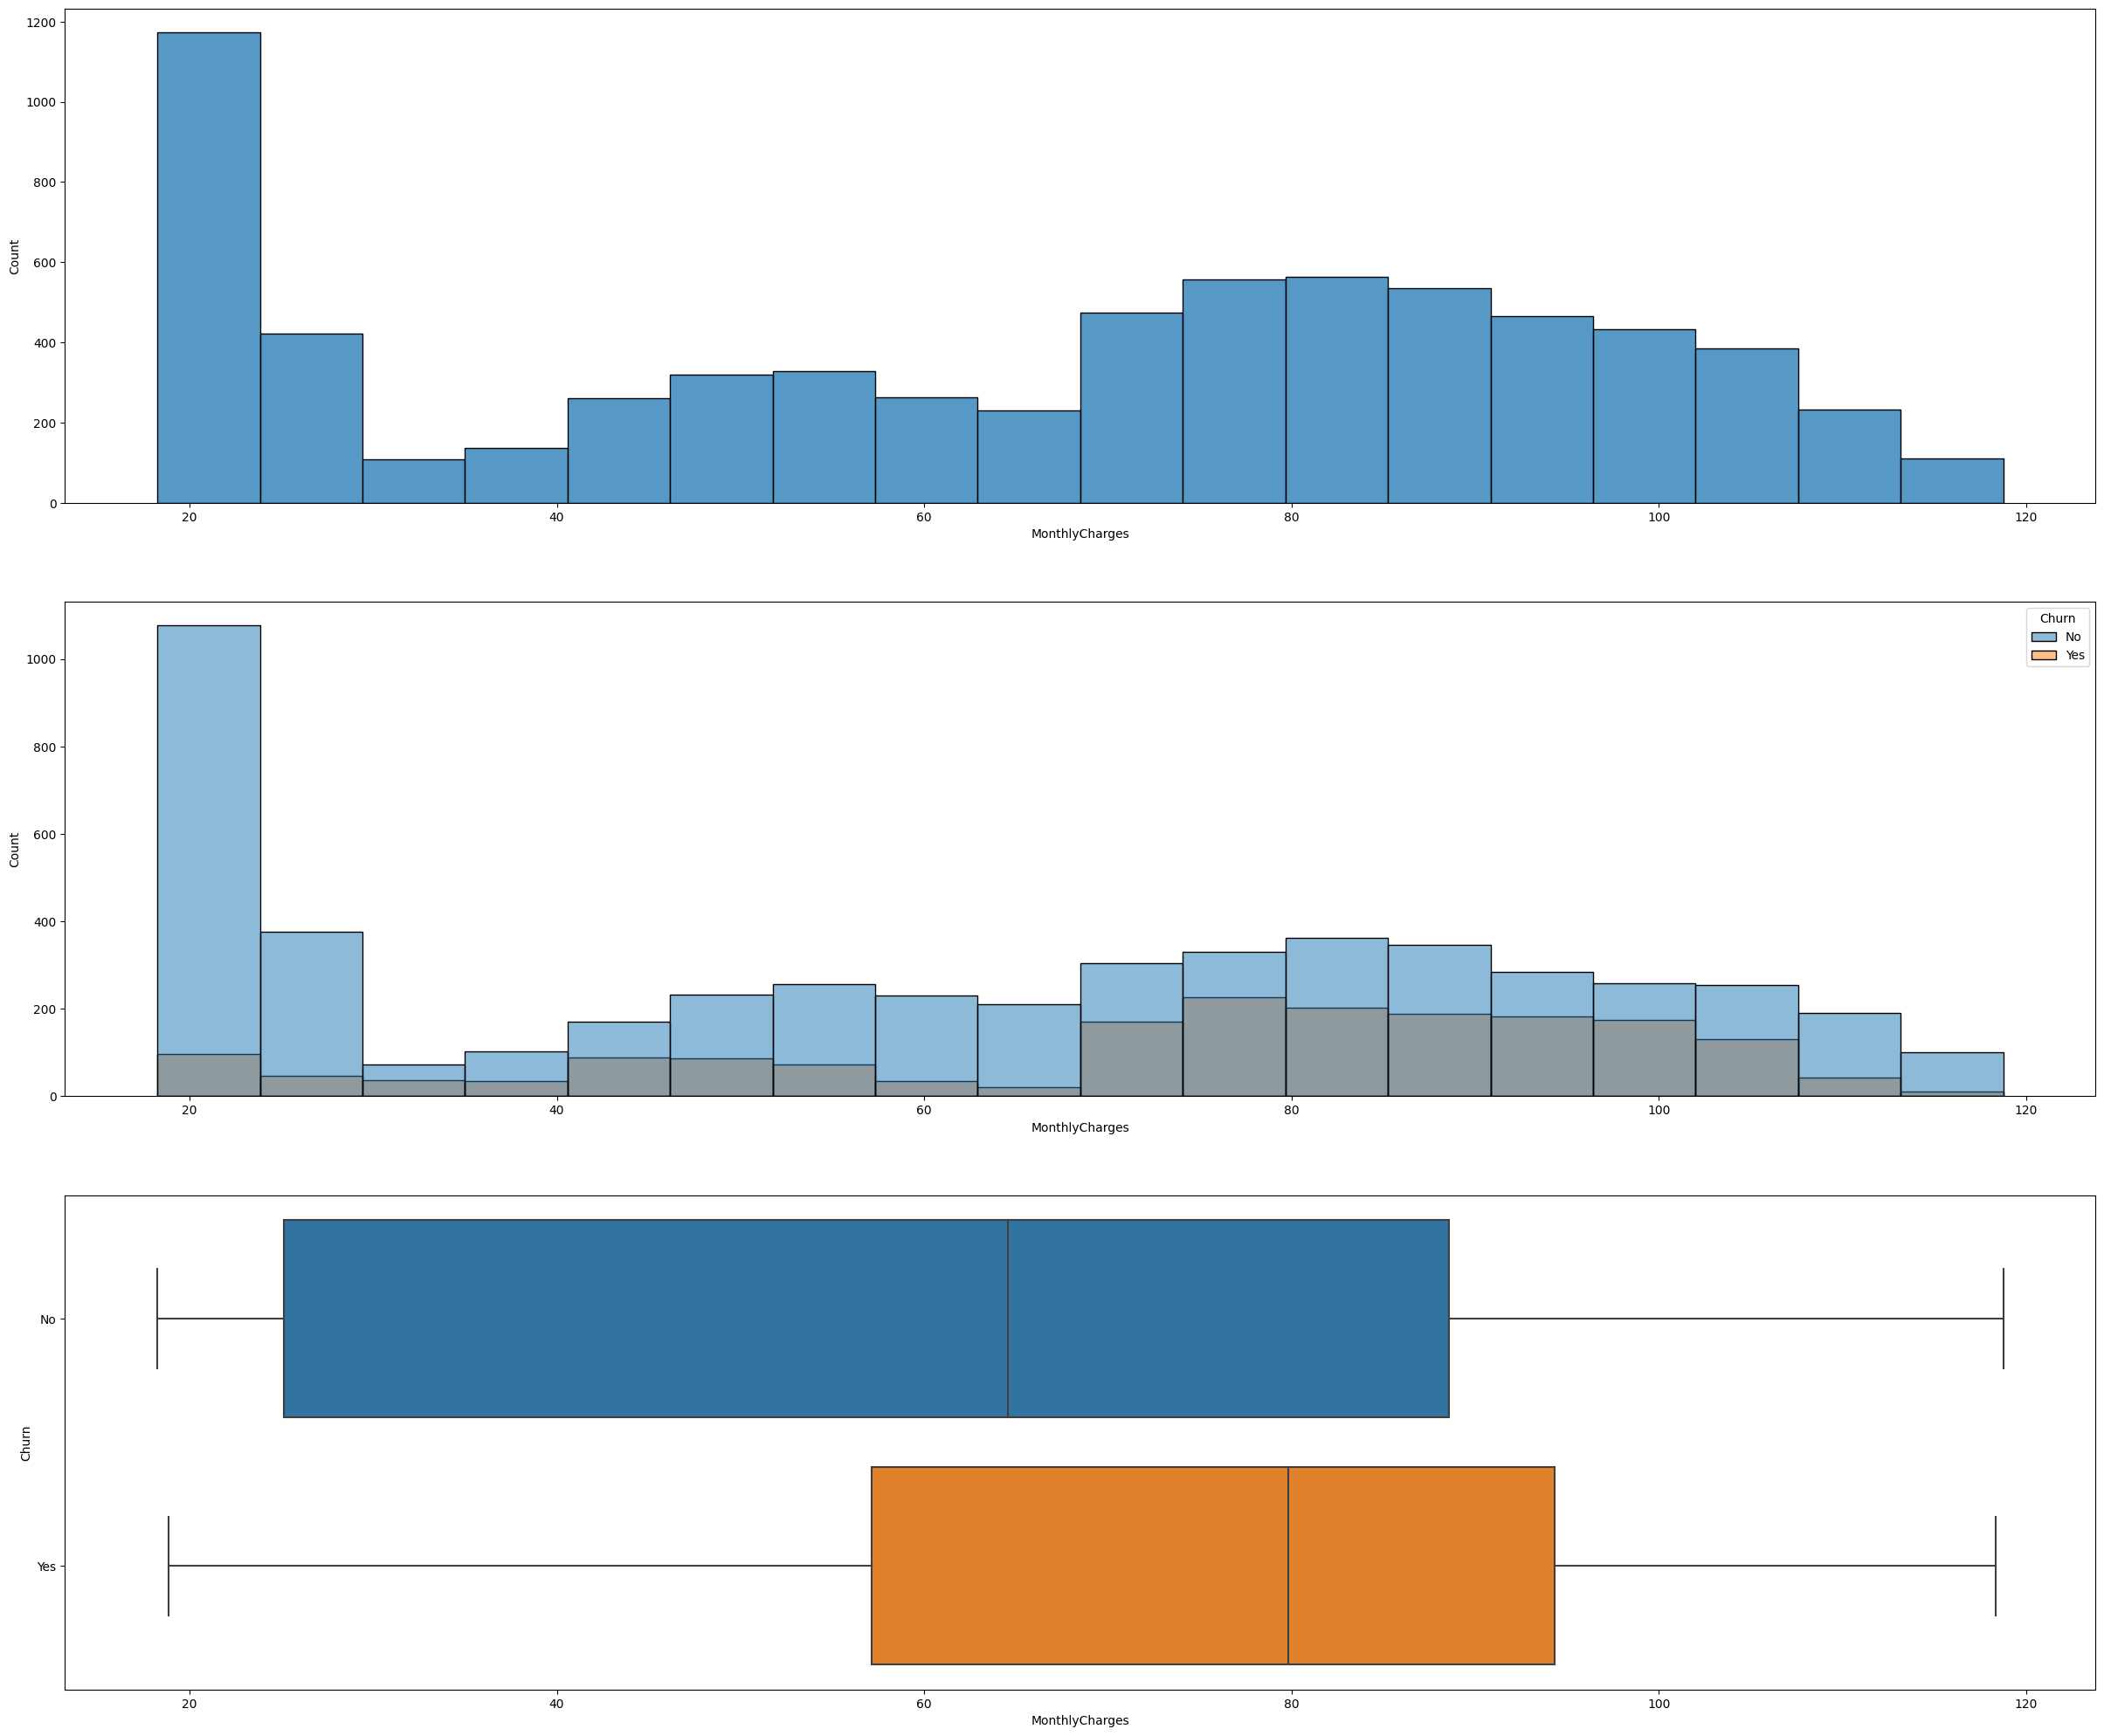

In [23]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="MonthlyCharges", ax=ax[0])
t = sns.histplot(data=df, x="MonthlyCharges", ax=ax[1], hue="Churn")
t = sns.boxplot(x="MonthlyCharges", y="Churn", data=df, ax=ax[2])

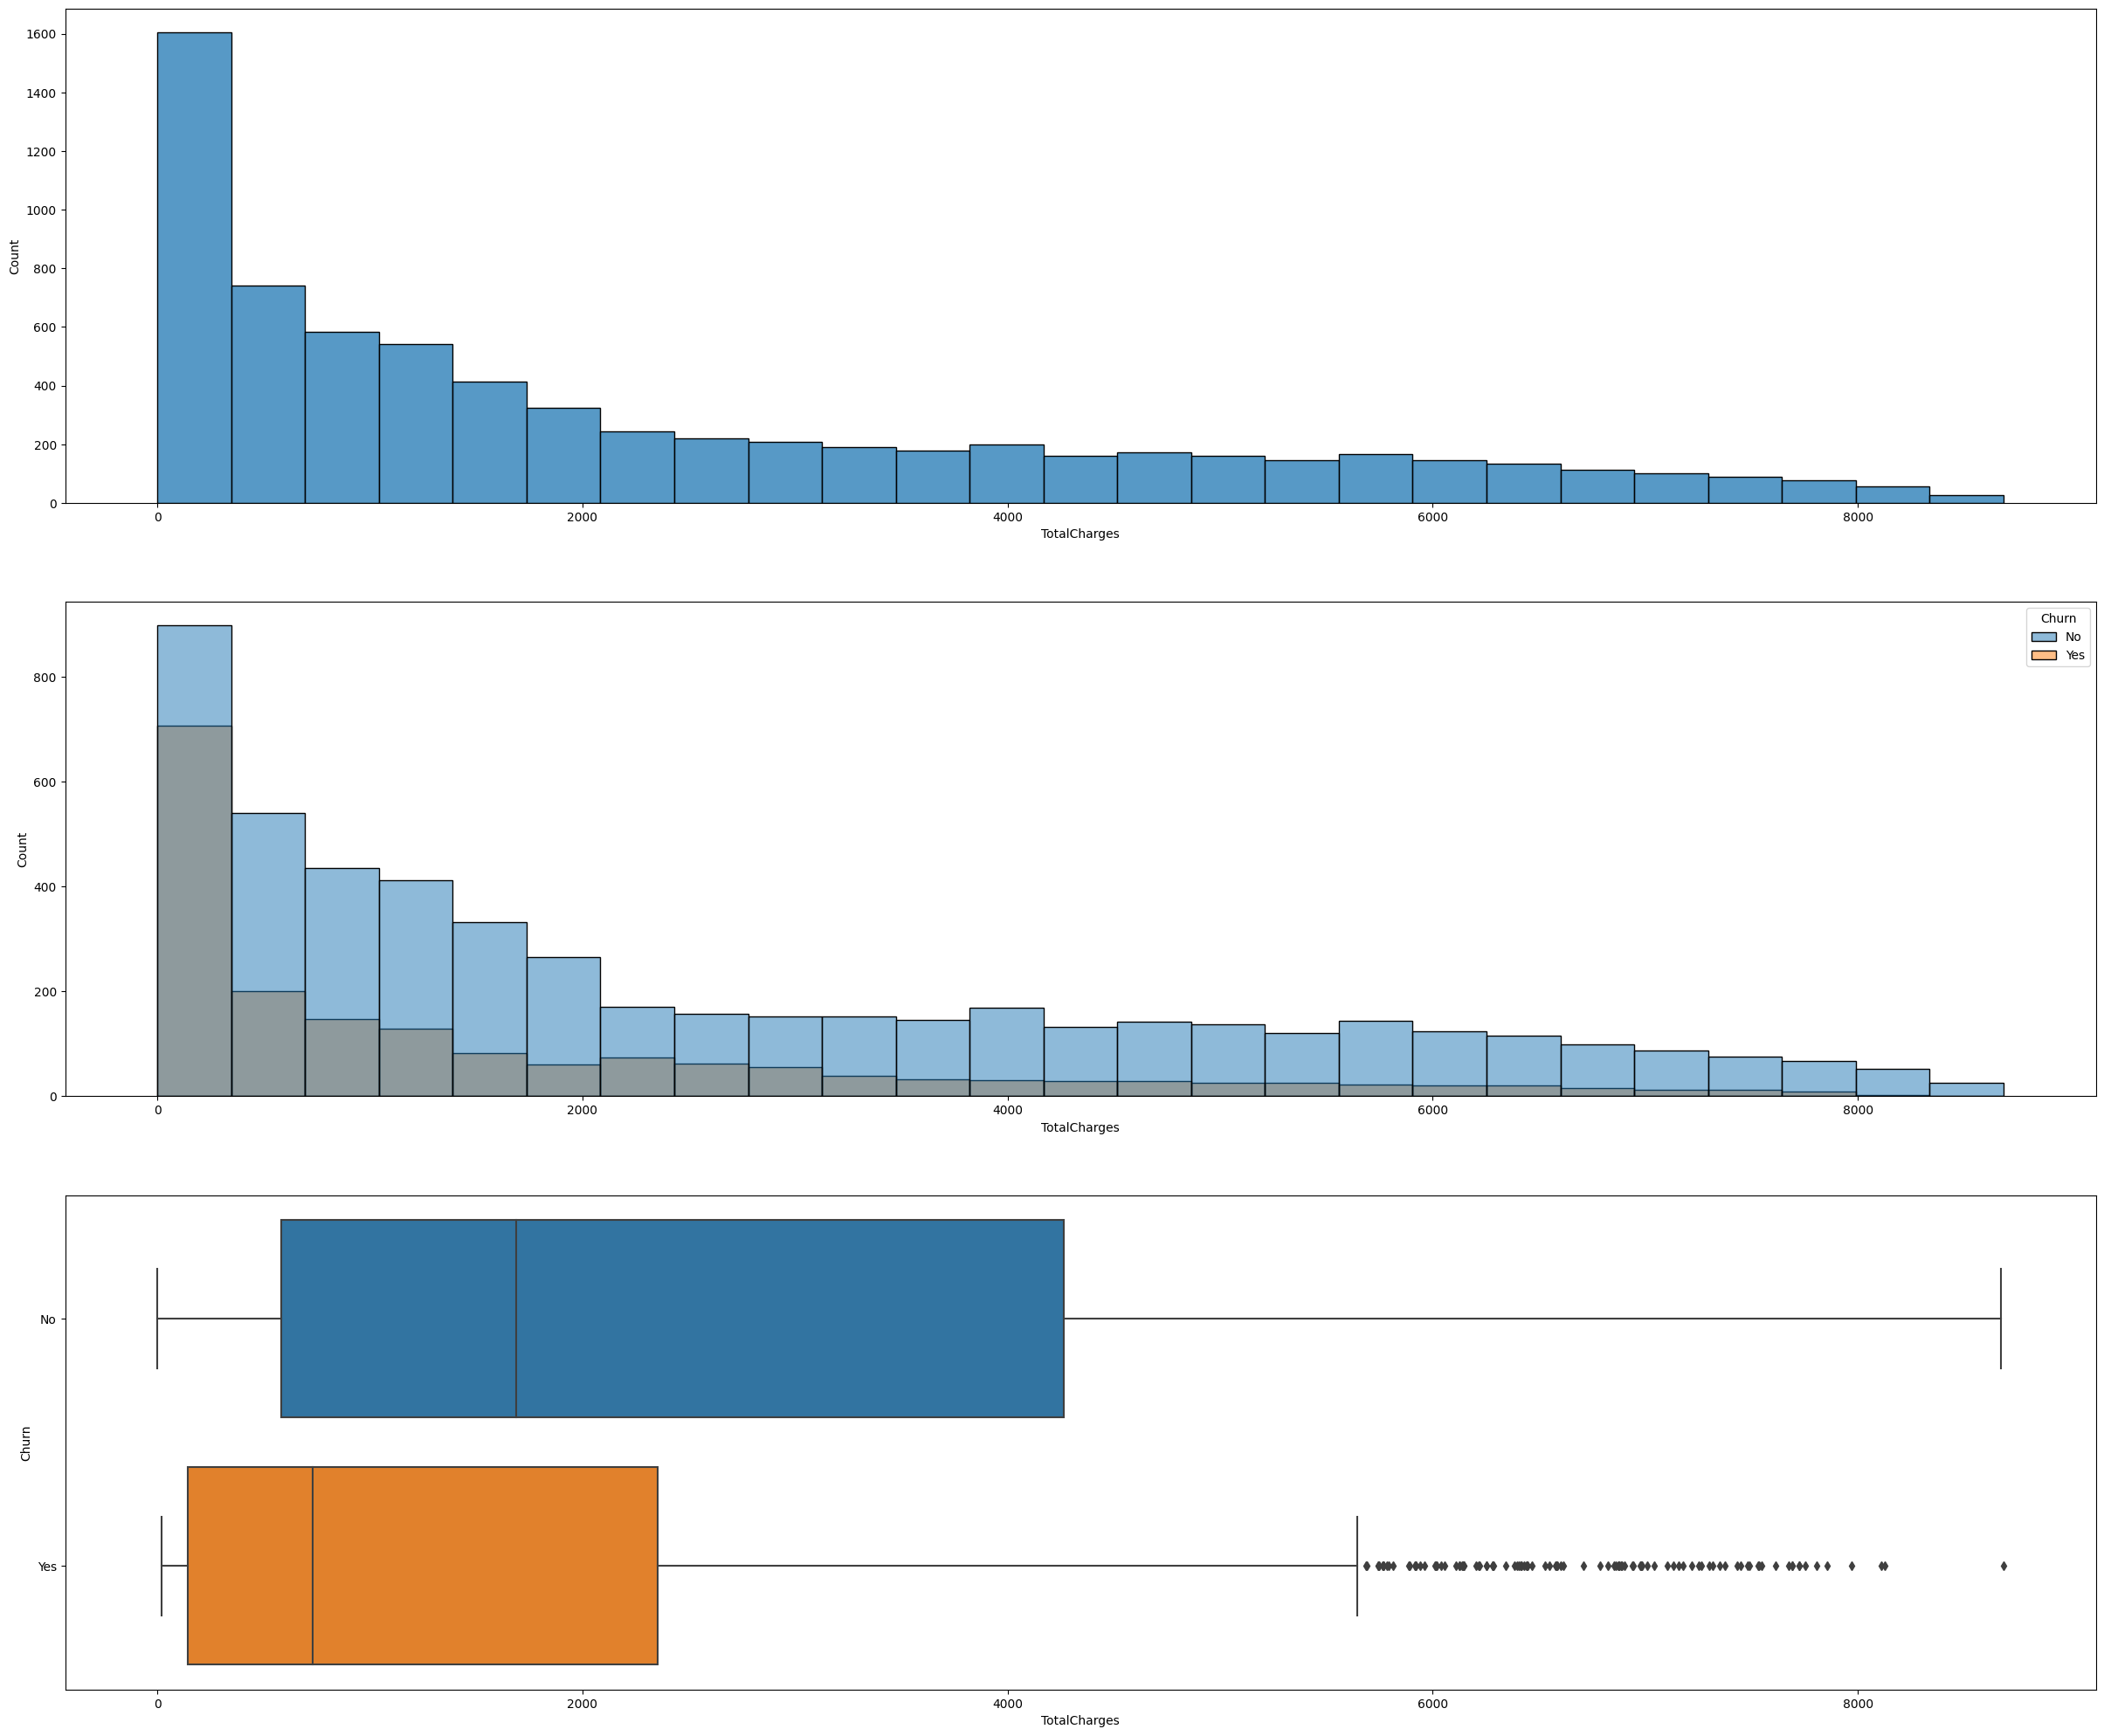

In [24]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="TotalCharges", ax=ax[0])
t = sns.histplot(data=df, x="TotalCharges", ax=ax[1], hue="Churn")
t = sns.boxplot(x="TotalCharges", y="Churn", data=df, ax=ax[2])

Customers with a high Totalcharge are not likely to stay which is connected to the discovered relationship between Churn and tenure

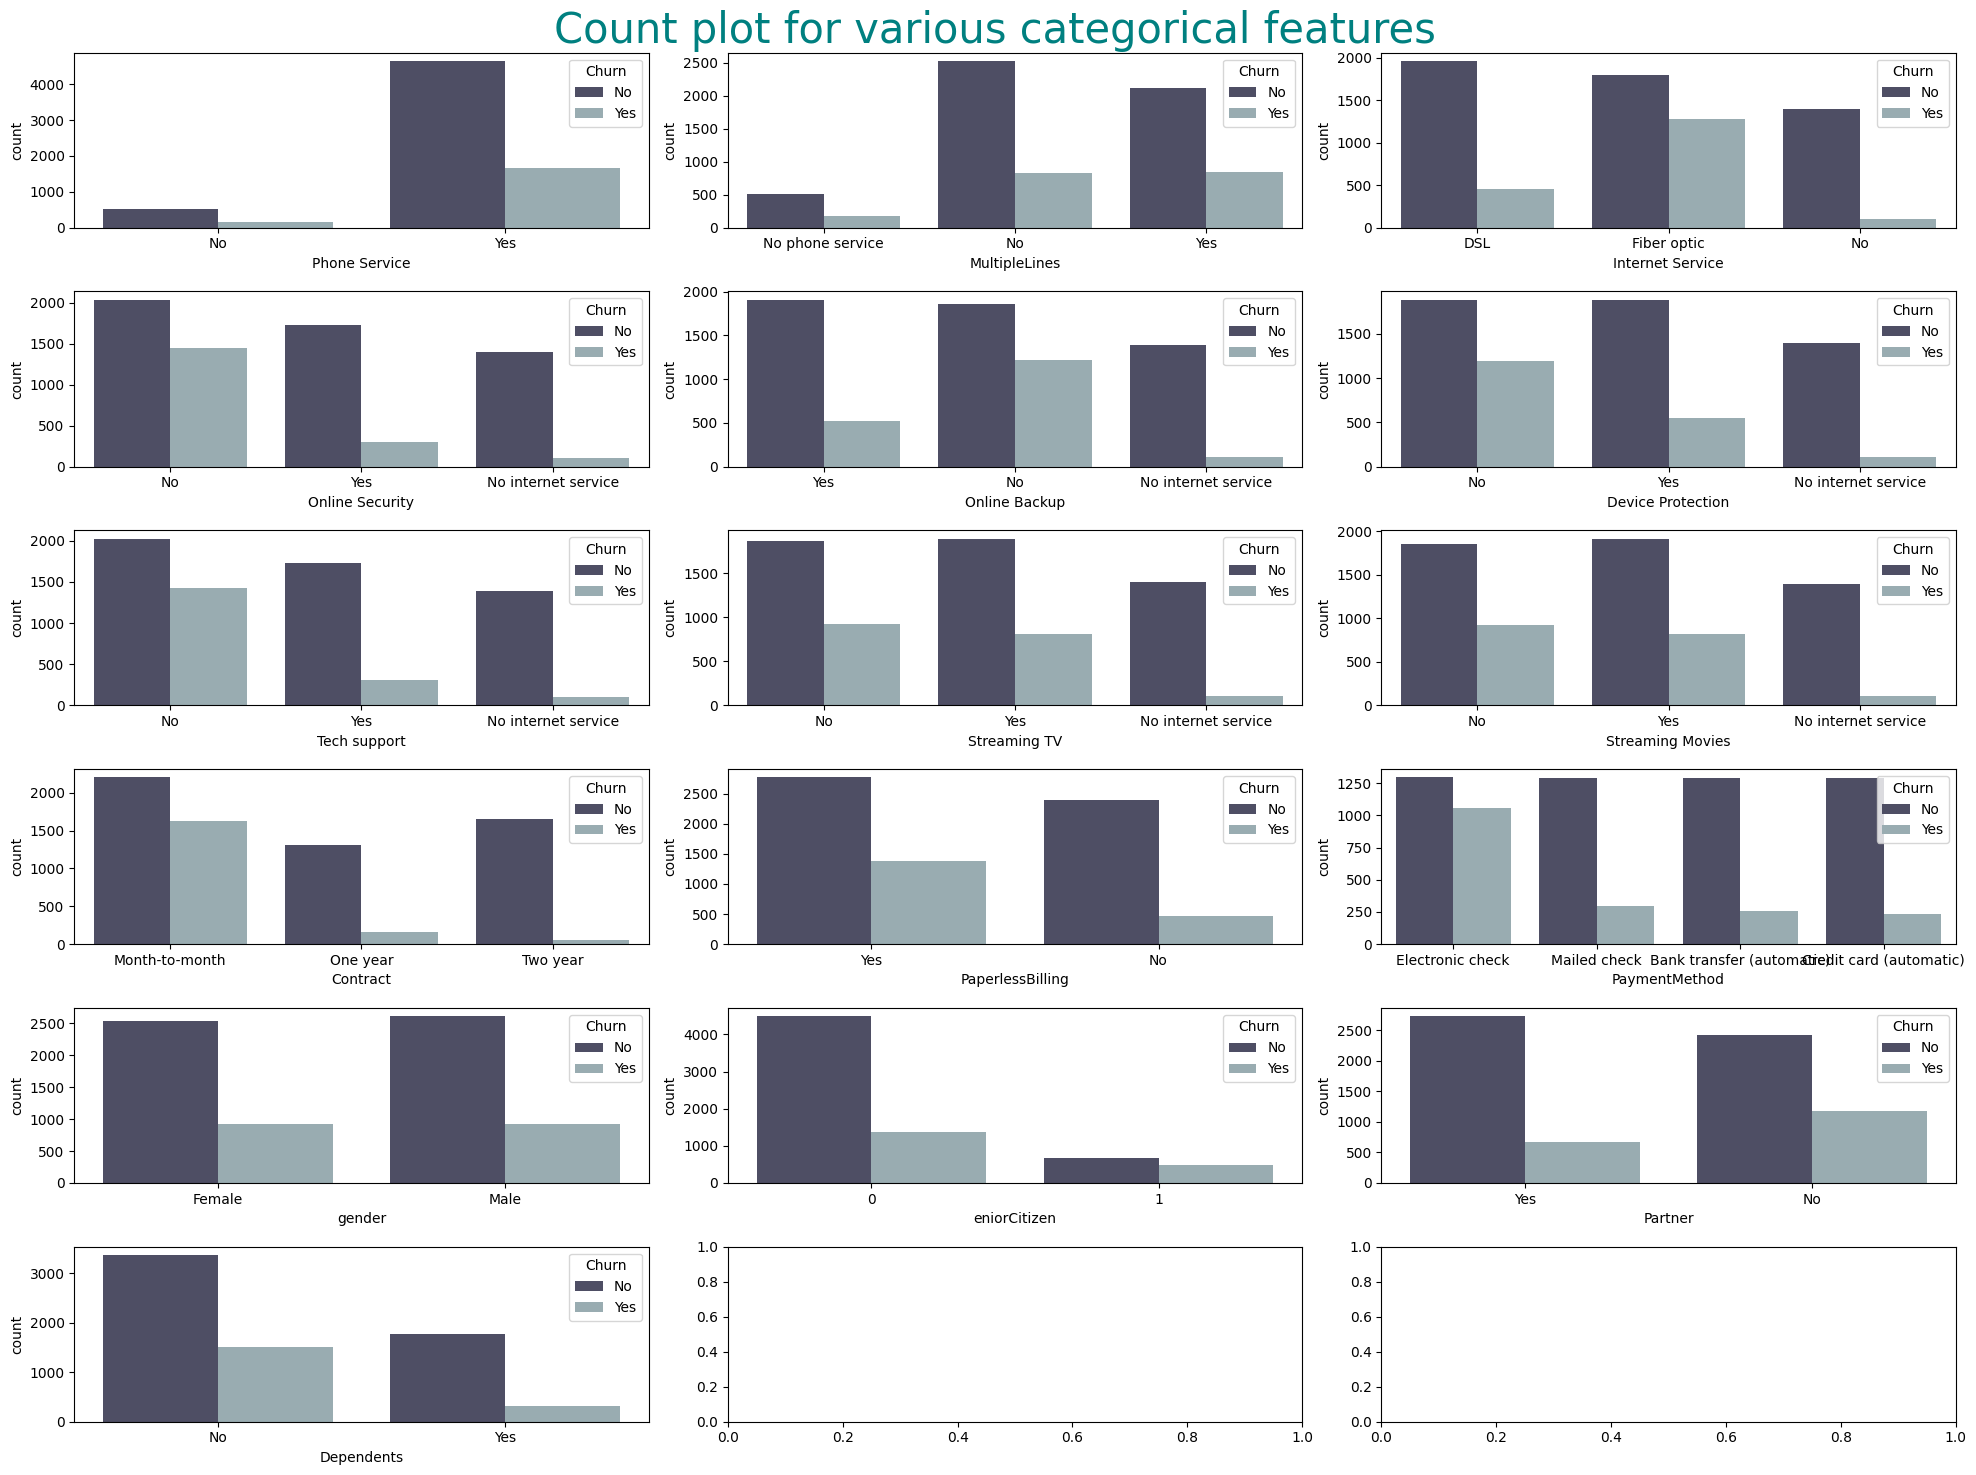

In [25]:
fig, ax = plt.subplots(6, 3, figsize = (20, 15))


plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'bone')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'bone')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'bone')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'bone')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'bone')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'bone')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'bone')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

ax9 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[3, 0], palette= 'bone')
ax9.set(xlabel = 'Contract')

ax10 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[3, 1], palette= 'bone')
ax10.set(xlabel = 'PaperlessBilling')

ax11 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[3, 2], palette= 'bone')
ax11.set(xlabel = 'PaymentMethod')

ax12 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[4, 0], palette= 'bone')
ax12.set(xlabel = 'gender')

ax13 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[4, 1], palette= 'bone')
ax13.set(xlabel = 'eniorCitizen')

ax14 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[4, 2], palette= 'bone')
ax14.set(xlabel = 'Partner')

ax15 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[5, 0], palette= 'bone')
ax15.set(xlabel = 'Dependents')


plt.tight_layout()
plt.show()

Customers without Online Security, Tech support, Online Backup and Device Protection are likely to churn
Customers with a month to month contract are more likely to churn

# Feature Selection

Feature Selection of categorical values using the P-value

In [26]:
categorical_features=['gender','Partner','Dependents','PhoneService',  
                        'MultipleLines' ,'InternetService','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport', 'StreamingTV' ,'StreamingMovies' ,
                        'Contract','PaperlessBilling','PaymentMethod']

In [27]:
from scipy import stats
statistical_significance=[]
for attr in categorical_features:
    data_count=pd.crosstab(df[attr],df["Churn"])
    #print(data_count)
    obs=data_count.values
    #print(obs)
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance)

,Attribute,P-value
0,gender,0.4635
1,Partner,0.0000
2,Dependents,0.0000
3,PhoneService,0.3984
4,MultipleLines,0.0011
5,InternetService,0.0000
6,OnlineSecurity,0.0000
7,OnlineBackup,0.0000
8,DeviceProtection,0.0000
9,TechSupport,0.0000


If the P-value is over 0.05 this feature is not significant to churn prediction

In [28]:
df=df.drop(['gender','PhoneService'],axis=1)

## Processing

Division between features and label

In [29]:

y = df['Churn']
X = df.drop("Churn", axis = 1)



Mapping the label to numerical values

In [30]:
y = y.map({"No":0, "Yes":1})

Creating a Pipeline to scale numerical features and encode categorical features

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = ["TotalCharges", "MonthlyCharges", "tenure"]
cat_attribs = [ele for ele in X.columns if ele not in num_attribs]
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [33]:
X_pre = preprocess_pipeline.fit_transform(X)
X = pd.DataFrame(X_pre)
X

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.998503,-1.167358,-1.287589,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.178093,-0.265547,0.058777,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.963960,-0.368706,-1.246790,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.199600,-0.753057,0.507566,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.944769,0.192014,-1.246790,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,-0.133536,0.661222,-0.349213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6997,2.236570,1.273522,1.609138,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6998,-0.858831,-1.175677,-0.879599,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6999,-0.876411,0.315139,-1.165192,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Train/Valid split

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

## Class weights

Since there are significantly more customers that do not churn (label 0) that there are that do churn (label 1) it is helpful to put more emphasis on customers that do churn so that the models do not ignore these cases

In [35]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(ytrain),
                                                 y=ytrain)
class_weights

array([0.67895247, 1.89701897])

## Modeling

In [36]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

creating a list of all models that should be tested

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(ExtraTreesClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state,class_weight=class_weights))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state,class_weight=class_weights))

Using crossvalidation to find a reliable overview over model performances

In [38]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors           Algorithm
0       0.826349        0.010200                 SVC
1       0.658887        0.017506        DecisionTree
2       0.751757        0.028414            AdaBoost
3       0.815787        0.006364        RandomForest
4       0.783946        0.012763          ExtraTrees
5       0.844744        0.015664    GradientBoosting
6       0.817375        0.016515             Xgboost
7       0.782748        0.016532         KNeighboors
8       0.846589        0.013353  LogisticRegression


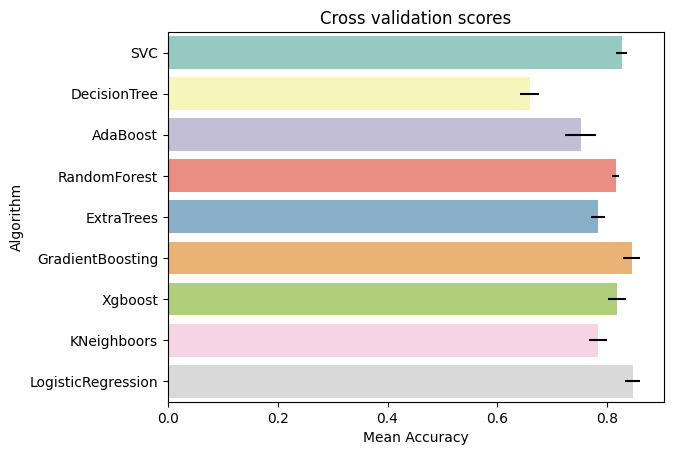

In [39]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Hyperparameter tuning

Hyperparameter Tuning using Randomized Search for 5 models

In [40]:
from sklearn.model_selection import RandomizedSearchCV
GBC = GradientBoostingClassifier()
gb_param_grid = {
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }
gsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)
 

gsGBC.fit(xtrain,ytrain)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [4, 8],
                                        'min_samples_leaf': [100, 150],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='roc_auc')

In [41]:
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

0.8480045492634989

In [46]:
evaluation(GBC_best ,xvalid, yvalid)

Test AUC: 0.8418336799647066
Train AUC: 0.8737038822255342


In [47]:
RFC = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsRFC.fit(xtrain,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.6789524733268671,
                                                            1: 1.897018970189702}),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [48]:
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

0.8455963894186496

In [49]:
evaluation(RFC_best,xvalid, yvalid)

Test AUC: 0.8358306548181761
Train AUC: 0.9250566450863346


In [50]:
SVMC = SVC(probability=True, class_weight=dict(enumerate(class_weights)))
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 100,200]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsSVMC.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(class_weight={0: 0.6789524733268671,
                                         1: 1.897018970189702},
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100, 200], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [51]:
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

0.8417717999635311

In [52]:
evaluation(gsSVMC,xvalid, yvalid)

Test AUC: 0.8388702443225983
Train AUC: 0.84561281506365


In [61]:
class_weight=int(ytrain.value_counts()[0]/ytrain.value_counts()[1])

In [62]:
XGBoost=xgboost.XGBClassifier(scale_pos_weight=class_weight)
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)

gsXGoost.fit(xtrain,ytrain)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           import...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=3, scoring='roc_auc')

In [63]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.8505617341998677

In [64]:
evaluation(XGBOOST_best,xvalid, yvalid)

Test AUC: 0.8428565051154389
Train AUC: 0.8580278310057592


In [65]:
logreg = LogisticRegression(class_weight=dict(enumerate(class_weights)))
logreg_param_grid={
    'C':[100, 10, 1.0, 0.1, 0.01] ,
    'penalty':['l2']
}
gslogreg=GridSearchCV(logreg,param_grid = logreg_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)
gslogreg.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.6789524733268671,
                                                        1: 1.897018970189702}),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             scoring='roc_auc', verbose=1)

In [66]:
LogReg_best = gslogreg.best_estimator_

# Best score
gslogreg.best_score_

0.8459529917148437

In [67]:
evaluation(LogReg_best,xvalid, yvalid)

Test AUC: 0.8413439318501712
Train AUC: 0.8491414688031458


## 10. Ensemble methods

Ensemble the best performing models to boost perfromance

In [82]:
votingC = VotingClassifier(estimators=[('gbc',GBC_best), ('rfc', RFC_best),
('xgboost',XGBOOST_best),('logreg',LogReg_best),("svc",SVMC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(xtrain,ytrain)

In [83]:
evaluation(votingC,xvalid, yvalid)

Test AUC: 0.843381704165879
Train AUC: 0.876897889674823


In [70]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= XGBOOST_best,random_state=42)

In [71]:
scv.fit(xtrain,ytrain)
evaluation(scv,xvalid, yvalid)

Test AUC: 0.808650290960274
Train AUC: 0.8464380952005446


## 11. Visualization of Final Model

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1032
           1       0.56      0.73      0.64       369

    accuracy                           0.78      1401
   macro avg       0.73      0.76      0.74      1401
weighted avg       0.81      0.78      0.79      1401



<AxesSubplot: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

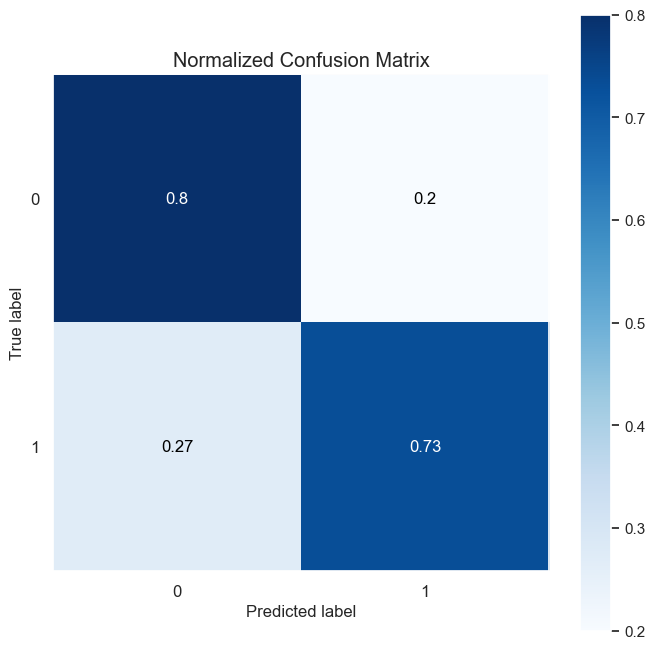

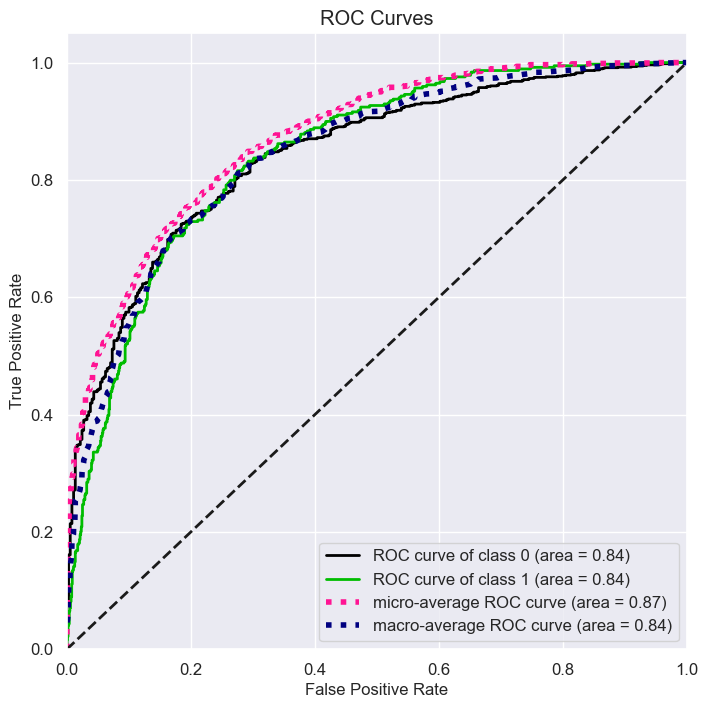

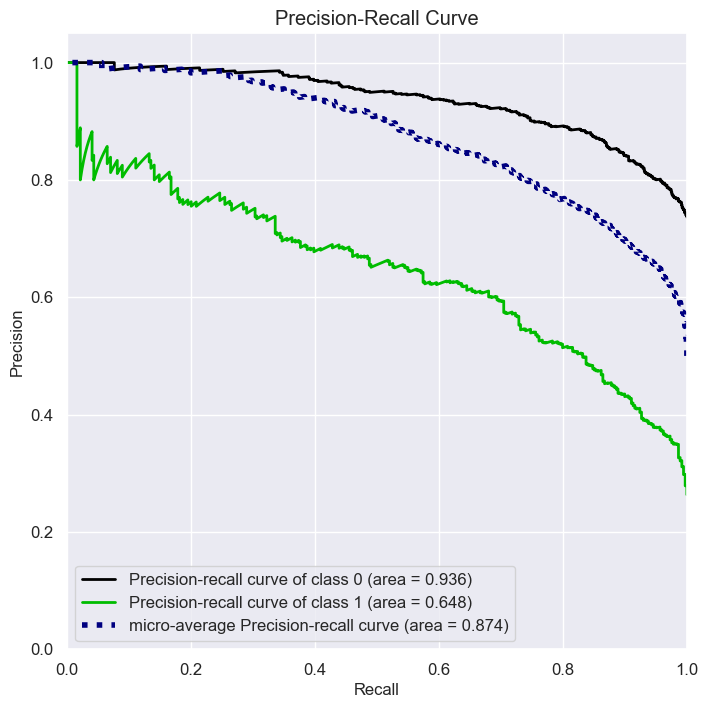

In [86]:
yvalid_probas = votingC.predict_proba(xvalid)
yvalid_predict = votingC.predict(xvalid)
print(classification_report(yvalid, yvalid_predict))
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, yvalid_predict, normalize=True)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, yvalid_probas)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, yvalid_probas)